In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('NSE_data_all_stocks_2017.csv')

In [3]:
data.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,3-Jan-17,EGAD,Eaagads Ltd,8.2,14,27.25,28,27.75,27.25,0.5,1.83%,"3,500",NaN
1,3-Jan-17,KUKZ,Kakuzi Plc,300,423.5,280,280,280,309,-29,9.39%,200,NaN
2,3-Jan-17,KAPC,Kapchorua Tea Kenya Plc,59,95,80,80,80,80,NaN,NaN,NaN,NaN
3,3-Jan-17,LIMT,Limuru Tea Plc,385,475,530,530,530,530,NaN,NaN,100,NaN
4,3-Jan-17,SASN,Sasini Plc,14.8,19.6,19.2,21,19.9,19.2,0.7,3.65%,"4,900",NaN


In [4]:
data.tail()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
16976,29-Dec-17,GLD,ABSA NewGold ETF,"1,235.00","1,835.00","1,265.00","1,265.00","1,265.00","1,265.00",NaN,NaN,NaN,NaN
16977,29-Dec-17,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,207.14,211.35,209.04,207.21,1.83,0.88%,NaN,NaN
16978,29-Dec-17,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","3,711.94","3,711.94","3,711.94","3,711.64",0.3,0.01%,NaN,NaN
16979,29-Dec-17,^N25I,NSE 25-Share Index,"2,943.60","4,207.90","4,283.38","4,283.38","4,283.38","4,242.38",41,0.97%,NaN,NaN
16980,29-Dec-17,^NASI,NSE All-Share Index,124.3,171.36,171.2,171.2,171.2,169.64,1.56,0.92%,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16981 entries, 0 to 16980
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       16981 non-null  object 
 1   CODE       16981 non-null  object 
 2   NAME       16981 non-null  object 
 3   12m Low    16981 non-null  object 
 4   12m High   16981 non-null  object 
 5   Day Low    16981 non-null  object 
 6   Day High   16981 non-null  object 
 7   Day Price  16981 non-null  object 
 8   Previous   16980 non-null  object 
 9   Change     10394 non-null  object 
 10  Change%    10384 non-null  object 
 11  Volume     12317 non-null  object 
 12  Adjust     1631 non-null   float64
dtypes: float64(1), object(12)
memory usage: 1.7+ MB


In [6]:
data.isnull()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16976,False,False,False,False,False,False,False,False,False,True,True,True,True
16977,False,False,False,False,False,False,False,False,False,False,False,True,True
16978,False,False,False,False,False,False,False,False,False,False,False,True,True
16979,False,False,False,False,False,False,False,False,False,False,False,True,True


In [7]:
data.isnull().sum()

DATE             0
CODE             0
NAME             0
12m Low          0
12m High         0
Day Low          0
Day High         0
Day Price        0
Previous         1
Change        6587
Change%       6597
Volume        4664
Adjust       15350
dtype: int64

In [8]:
#fill missing values with 0
df = data.fillna(0)
df

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,3-Jan-17,EGAD,Eaagads Ltd,8.2,14,27.25,28,27.75,27.25,0.5,1.83%,"3,500",0.0
1,3-Jan-17,KUKZ,Kakuzi Plc,300,423.5,280,280,280,309,-29,9.39%,200,0.0
2,3-Jan-17,KAPC,Kapchorua Tea Kenya Plc,59,95,80,80,80,80,0,0,0,0.0
3,3-Jan-17,LIMT,Limuru Tea Plc,385,475,530,530,530,530,0,0,100,0.0
4,3-Jan-17,SASN,Sasini Plc,14.8,19.6,19.2,21,19.9,19.2,0.7,3.65%,"4,900",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16976,29-Dec-17,GLD,ABSA NewGold ETF,"1,235.00","1,835.00","1,265.00","1,265.00","1,265.00","1,265.00",0,0,0,0.0
16977,29-Dec-17,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,207.14,211.35,209.04,207.21,1.83,0.88%,0,0.0
16978,29-Dec-17,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","3,711.94","3,711.94","3,711.94","3,711.64",0.3,0.01%,0,0.0
16979,29-Dec-17,^N25I,NSE 25-Share Index,"2,943.60","4,207.90","4,283.38","4,283.38","4,283.38","4,242.38",41,0.97%,0,0.0


In [9]:
df.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
dtype: int64

In [10]:
df['NAME'].value_counts()

Eaagads Ltd                                 244
Home Afrika Ltd                             244
Kakuzi Plc                                  244
Kenya Electricity Generating Company Plc    244
KPLC-P4                                     244
                                           ... 
NSE 25-Share Index                          242
NSE 20-Share Index                          234
NSE All-Share Index                         233
FTSE NSE Kenya 25 Index                     228
ABSA NewGold ETF                            184
Name: NAME, Length: 70, dtype: int64

In [13]:
df.dtypes

DATE          object
CODE          object
NAME          object
12m Low       object
12m High      object
Day Low       object
Day High      object
Day Price     object
Previous      object
Change        object
Change%       object
Volume        object
Adjust       float64
dtype: object

Text(0, 0.5, 'Adjust')

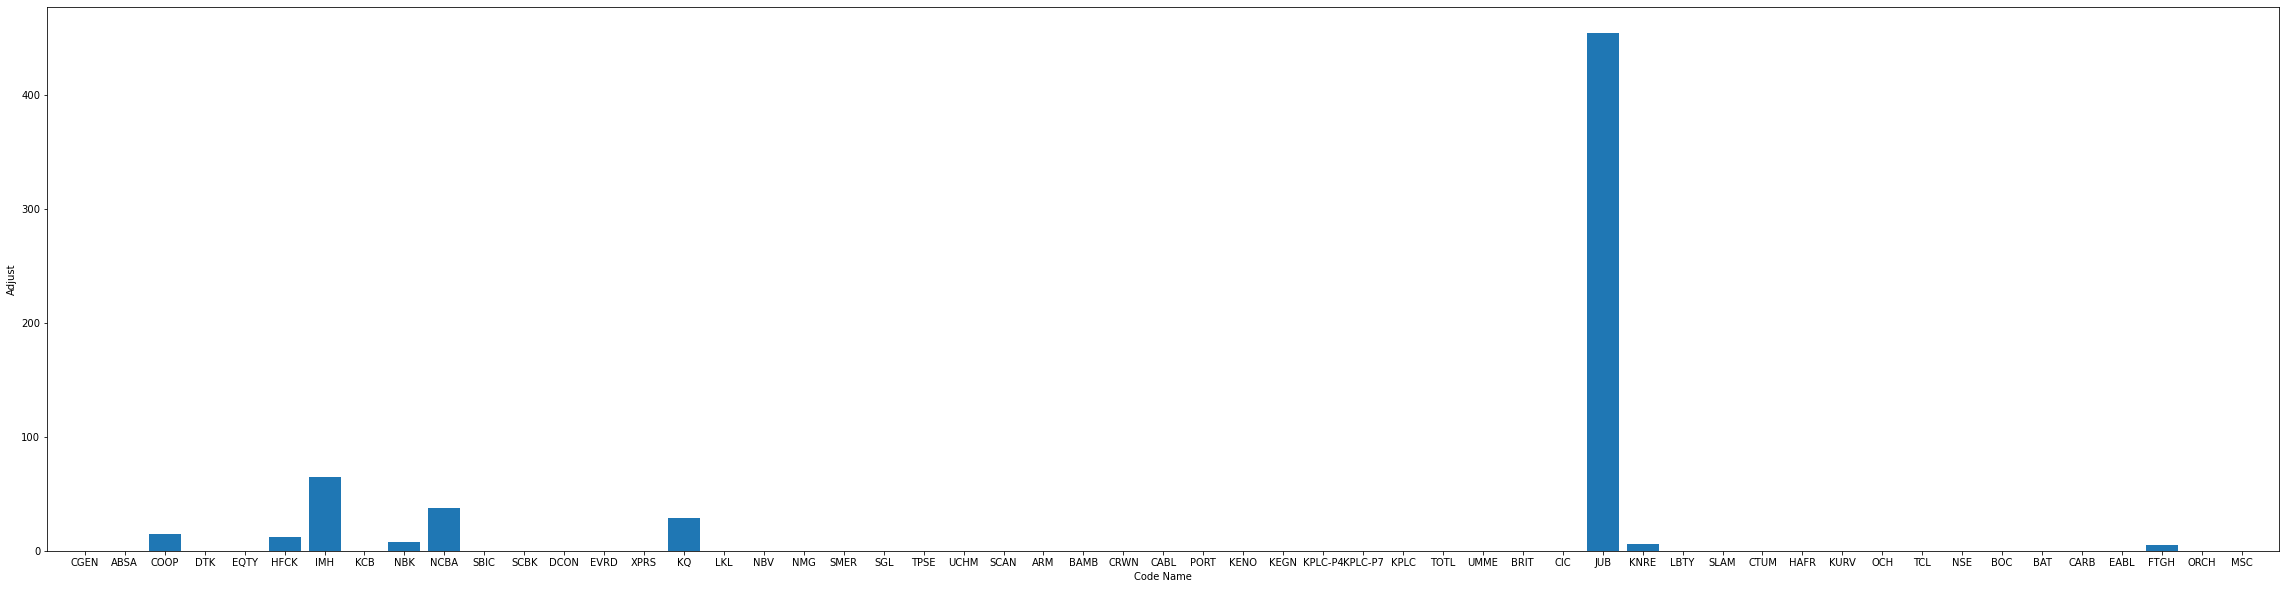

In [11]:
plt.figure(figsize = (40,10))
plt.bar(data['CODE'], data['Adjust'])
plt.xlabel('Code Name')
plt.ylabel('Adjust')